In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

# Note that there are no NANs in these data; '?' is
# used when there is missing information
accepts = pd.read_csv('./RCdata/chefmozaccepts.csv')
cuisine = pd.read_csv('./RCdata/chefmozcuisine.csv')
hours = pd.read_csv('./RCdata/chefmozhours4.csv')
parking = pd.read_csv('./RCdata/chefmozparking.csv')
geo = pd.read_csv('./RCdata/geoplaces2.csv',  encoding='latin-1') 
usercuisine = pd.read_csv('./RCdata/usercuisine.csv')
payment = pd.read_csv('./RCdata/userpayment.csv')
profile = pd.read_csv('./RCdata/userprofile.csv')
rating = pd.read_csv('./RCdata/rating_final.csv')

In [2]:
accepts.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


In [3]:
print("There are {} unique placeID's.".format(len(accepts.placeID.unique())))
print("There are {} unique Rpayment categories:".format(len(accepts.Rpayment.unique())))
print(accepts.Rpayment.unique())

There are 615 unique placeID's.
There are 12 unique Rpayment categories:
['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


In [4]:
cuisine.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [5]:
print("There are {} unique placeID's.".format(len(cuisine.placeID.unique())))
print("There are {} unique Rcuisine categories:".format(len(cuisine.Rcuisine.unique())))
print(cuisine.Rcuisine.unique())

There are 769 unique placeID's.
There are 59 unique Rcuisine categories:
['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


In [6]:
hours.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [7]:
print("There are {} unique placeID's.".format(len(hours.placeID.unique())))

There are 694 unique placeID's.


In [8]:
parking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [9]:
print("There are {} unique placeID's.".format(len(parking.placeID.unique())))
print("There are {} unique parking_lot categories:".format(len(parking.parking_lot.unique())))
print(parking.parking_lot.unique())

There are 675 unique placeID's.
There are 7 unique parking_lot categories:
['public' 'none' 'yes' 'valet parking' 'fee' 'street' 'validated parking']


In [10]:
geo.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [11]:
print("There are {} unique placeID's.".format(len(geo.placeID.unique())))

There are 130 unique placeID's.


In [12]:
usercuisine.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [13]:
print("There are {} unique userID's.".format(len(usercuisine.userID.unique())))
print("There are {} unique Rcuisine categories:".format(len(usercuisine.Rcuisine.unique())))
print(usercuisine.Rcuisine.unique())

There are 138 unique userID's.
There are 103 unique Rcuisine categories:
['American' 'Mexican' 'Bakery' 'Breakfast-Brunch' 'Japanese'
 'Contemporary' 'Bagels' 'Cafe-Coffee_Shop' 'Continental-European'
 'Cafeteria' 'Family' 'Juice' 'Hawaiian' 'Hot_Dogs' 'Latin_American'
 'Korean' 'Italian' 'Diner' 'Fast_Food' 'Deli-Sandwiches' 'Regional'
 'Fusion' 'Portuguese' 'Indian-Pakistani' 'Eastern_European' 'Lebanese'
 'Moroccan' 'Barbecue' 'Polynesian' 'Polish' 'Chinese' 'Pizzeria'
 'Burgers' 'Afghan' 'Middle_Eastern' 'Mongolian' 'Bar' 'Cuban' 'Tex-Mex'
 'Spanish' 'Soup' 'Sushi' 'Game' 'Doughnuts' 'Australian' 'Asian'
 'Dessert-Ice_Cream' 'Seafood' 'Turkish' 'Organic-Healthy' 'Steaks'
 'Mediterranean' 'British' 'Austrian' 'Israeli' 'Russian-Ukrainian'
 'Malaysian' 'Vegetarian' 'Peruvian' 'Tapas' 'Eclectic' 'African' 'Basque'
 'Canadian' 'Irish' 'Southwestern' 'Tea_House' 'International'
 'Pacific_Northwest' 'German' 'Persian' 'Ethiopian' 'Romanian' 'Cambodian'
 'Pacific_Rim' 'Tunisian' 'Filipino

In [14]:
payment.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [15]:
print("There are {} unique userID's.".format(len(payment.userID.unique())))
print("There are {} unique Upayment categories:".format(len(payment.Upayment.unique())))
print(payment.Upayment.unique())

There are 133 unique userID's.
There are 5 unique Upayment categories:
['cash' 'bank_debit_cards' 'MasterCard-Eurocard' 'VISA' 'American_Express']


In [16]:
profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [17]:
print("There are {} unique userID's.".format(len(profile.userID.unique())))

There are 138 unique userID's.


In [18]:
rating.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [19]:
print("There are {} unique userID's.".format(len(rating.userID.unique())))
print("There are {} unique placeID's.".format(len(rating.placeID.unique())))
print("There are {} * 3 ratings.".format(len(rating)))

There are 138 unique userID's.
There are 130 unique placeID's.
There are 1161 * 3 ratings.


In [20]:
rating.iloc[:,2:].describe()

,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000
mean,1.199828,1.215332,1.090439
std,0.773282,0.792294,0.790844
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


In [21]:
res_all = np.concatenate((accepts.placeID.unique(), cuisine.placeID.unique(), 
                          hours.placeID.unique(), parking.placeID.unique(), geo.placeID.unique()))
res_all = np.sort( np.unique(res_all) ) # All the placeID's

print("There are {} restaurants.".format(len(res_all)))

There are 938 restaurants.


In [22]:
user_all = np.concatenate((usercuisine.userID.unique(), payment.userID.unique(), 
                           profile.userID.unique()))
user_all = np.sort( np.unique(user_all) ) # All the userID's

print("There are {} users.".format(len(user_all)))

There are 138 users.


In [23]:
overall_rating = pd.DataFrame( np.zeros((len(res_all),len(user_all)))-1.0, 
                              columns=user_all, index=res_all )
food_rating = overall_rating.copy()
service_rating = overall_rating.copy() 

for r, u, o, f, s in zip(rating.placeID, rating.userID, rating.rating, rating.food_rating, 
                         rating.service_rating):
    overall_rating.loc[r,u] = o
    food_rating.loc[r,u] = f
    service_rating.loc[r,u] = s

In [24]:
review = pd.DataFrame( np.zeros(overall_rating.shape), columns=user_all, index=res_all)
review[overall_rating >= 0] = 1

In [25]:
# use dummy variables for different cuisine categories of the restaurants
res_cuisine = pd.get_dummies(cuisine,columns=['Rcuisine'])

# remove duplicate restaurant ID's. 
# A restaurant with multiple cuisine categories would have multiple columns equal 1
res_cuisine = res_cuisine.groupby('placeID',as_index=False).sum()

res_cuisine.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
parking.parking_lot.value_counts()

none                 348
yes                  174
public               102
street                32
fee                   22
valet parking         21
validated parking      3
Name: parking_lot, dtype: int64

In [27]:
res_parking = parking.copy()
res_parking.parking_lot = res_parking.parking_lot.map({'fee':1, 'none':0, 'public':1, 'yes':2,
                                        'street':1, 'valet parking':1, 'validated parking':1})

# remove duplicate restaurant ID's. 
# A restaurant with multiple parking options may have a value > 2
res_parking = res_parking.groupby('placeID',as_index=False).sum()

In [28]:
res_info = geo[['latitude','longitude','placeID','name','address','city','state']]

# These features should be relevant for rating prediction since they are about services 
# and price. Especially, 'alcohol','smoking_area', and 'price' relate to 'drink_level', 
# 'smoker', and 'budget' in the user profiles 
res_service_price = geo[['placeID','alcohol','smoking_area','other_services','price']]
print(res_service_price.alcohol.value_counts())
print('\n')
print(res_service_price.smoking_area.value_counts())
print('\n')
print(res_service_price.other_services.value_counts())
print('\n')
print(res_service_price.price.value_counts())

No_Alcohol_Served    87
Wine-Beer            34
Full_Bar              9
Name: alcohol, dtype: int64


none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64


none        119
variety       7
Internet      4
Name: other_services, dtype: int64


medium    60
low       45
high      25
Name: price, dtype: int64


In [29]:
# 1 if alcohol is available, 0 otherwise
res_service_price.alcohol = res_service_price.alcohol.map(lambda x: 0 if x == 'No_Alcohol_Served' else 1)
# 1 if there is smoking area, 0 otherwise
res_service_price.smoking_area = res_service_price.smoking_area.map(lambda x: 0 if (x == 'none') | (x == 'not permitted') else 1)
# 1 if other services are available, 0 otherwise
res_service_price.other_services = res_service_price.other_services.map(lambda x: 0 if x == 'none'  else 1)
# map price levels to numbers
res_service_price.price = res_service_price.price.map({'low': 1, 'medium': 2, 'high': 3})

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [30]:
# Whether these features are relevant is not so clear
res_environment = geo[['placeID','dress_code','accessibility','Rambience','area']]
print(res_environment.dress_code.value_counts())
print('\n')
print(res_environment.accessibility.value_counts())
print('\n')
print(res_environment.Rambience.value_counts())
print('\n')
print(res_environment.area.value_counts())

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64


no_accessibility    76
completely          45
partially            9
Name: accessibility, dtype: int64


familiar    121
quiet         9
Name: Rambience, dtype: int64


closed    115
open       15
Name: area, dtype: int64


In [31]:
# 1 if formal dress is required, 0 otherwise
res_environment.dress_code = res_environment.dress_code.map({'informal':0, 'casual':0, 'formal': 1})
# map accessibility levels to numbers
res_environment.accessibility = res_environment.accessibility.map({'no_accessibility':0, 'partially':1, 'completely': 2})
res_environment.Rambience = res_environment.Rambience.map({'familiar':0, 'quiet': 1})
res_environment.area = res_environment.area.map({'open':0, 'closed':1})

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
df_res = pd.DataFrame({'placeID': res_all})
df_res = pd.merge(left=df_res, right=res_cuisine, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_parking, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_service_price, how="left", on="placeID")
df_res = pd.merge(left=df_res, right=res_environment, how="left", on="placeID")

print(df_res.shape)
df_res.head()

(938, 69)


,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Vietnamese,parking_lot,alcohol,smoking_area,other_services,price,dress_code,accessibility,Rambience,area
0,132001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# The placeID's for the 130 restaurants with ratings
res_rated = res_all[np.sum(review,axis=1) > 0] 

# tells us whether a restaurant-user pair has a rating. 0 means No and 1 means Yes.
R = review.loc[res_rated].values  # shape = (130,138)

Y_service = service_rating.loc[res_rated].values
Y_overall = overall_rating.loc[res_rated].values
Y_food  = food_rating.loc[res_rated].values

In [34]:
# select the indices of "df_res" where a restaurant has ratings
index = np.array([x in res_rated for x in df_res['placeID'].values])
index = np.where(index == True)[0]
# restaurant features for the 130 restaurants with ratings
X = df_res.loc[index, :].reset_index(drop=True)
print(X.isnull().sum()) # all the NANs are from cuisine 

placeID                           0
Rcuisine_Afghan                  35
Rcuisine_African                 35
Rcuisine_American                35
Rcuisine_Armenian                35
Rcuisine_Asian                   35
Rcuisine_Bagels                  35
Rcuisine_Bakery                  35
Rcuisine_Bar                     35
Rcuisine_Bar_Pub_Brewery         35
Rcuisine_Barbecue                35
Rcuisine_Brazilian               35
Rcuisine_Breakfast-Brunch        35
Rcuisine_Burgers                 35
Rcuisine_Cafe-Coffee_Shop        35
Rcuisine_Cafeteria               35
Rcuisine_California              35
Rcuisine_Caribbean               35
Rcuisine_Chinese                 35
Rcuisine_Contemporary            35
Rcuisine_Continental-European    35
Rcuisine_Deli-Sandwiches         35
Rcuisine_Dessert-Ice_Cream       35
Rcuisine_Diner                   35
Rcuisine_Dutch-Belgian           35
Rcuisine_Eastern_European        35
Rcuisine_Ethiopian               35
Rcuisine_Family             

In [35]:
X = X.fillna(0) # fill all NANs with 0
# drop a feature if the entire column are 0
features_to_drop = X.columns.values[np.sum(X,axis=0) == 0] 
X = X.drop(features_to_drop, axis=1)
X = X.drop(['placeID'], axis=1)
X.head()

,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,Rcuisine_Cafeteria,Rcuisine_Chinese,...,Rcuisine_Vietnamese,parking_lot,alcohol,smoking_area,other_services,price,dress_code,accessibility,Rambience,area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [36]:
X = X[['parking_lot','alcohol','smoking_area','other_services','price','dress_code','accessibility']]
X['x0'] = 1 # add a bias term for linear regressions
X.head()

,parking_lot,alcohol,smoking_area,other_services,price,dress_code,accessibility,x0
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
2,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1
3,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [37]:
num_rating = np.round(np.sum(R,axis=0)) # number of ratings from each user (minimum = 3)

# 25% of the existing ratings will be used as the validation set
# So during the training, they will be flagged 
g = lambda x: int(round(x*0.25)) 
flag = np.array( [g(x) for x in num_rating] )

random.seed(0)
cond = True

while cond:

    R_train = R.copy()

    # loop over each user
    for i in range(R_train.shape[1]):
        # the restaurants that are rated
        index = list( np.where(R_train[:,i] == 1)[0] )  
        # randomly select about 25% of them to be flagged
        index_flag = random.sample(index,flag[i])
        R_train[index_flag,i] = 0  
    
    # make sure in the traning set, each restaurant and each user receives/gives at least 
    # 2 ratings
    if (np.sum(R_train,axis=0).min() > 1) & (np.sum(R_train,axis=1).min() > 1): 
        cond = False
        
R_valid = R - R_train 
# Now "R_train" contains 876 ones, and "R_valid" contains 285 ones ("R" contains 1161 ones)
# The shape of "R", "R_train" and "R_valid" are all (130,138)  
print(R_train.sum())
print(R_valid.sum())

876.0
285.0


In [38]:
# FCP
def FCP(Y,Y_pred,R):
    
    # list of true ratings from each user (we only select users with at least two ratings)
    Y_fcp = []  
    Y_pred_fcp = [] # list of predicted ratings from each user 
    n_user = R.shape[1]
    
    for i in range(n_user):
        
        cond = (R.sum(axis=0) >= 2)[i] # there should be at least two ratings from a user
        index = np.where( R[:,i] == 1)[0] # the indices (restaurants) with ratings
    
        if cond:
            
            Y_fcp.append( (Y*R)[:,i][index] )
            Y_pred_fcp.append( (Y_pred*R)[:,i][index] )

        
    n_fcp = len(Y_fcp) # number of users with at least two ratings
    TP = 0. # Total number of pairs
    DP = 0. # number of discordant pairs
    CP = 0. # number of concordant pairs (excluding ties)
    
    for i in range(n_fcp):
        
        num_Y = len(Y_fcp[i])   # number of ratings from a user
        TP += num_Y*(num_Y-1)/2 # number of rating pairs = n*(n+1)/2 

        greater = np.array([])
        greater_pred = np.array([])

        # this loop is to go over all the rating pairs
        for j in range(num_Y-1):
            
            not_equal = Y_fcp[i][j] != Y_fcp[i][j+1:]
            greater = Y_fcp[i][j] > Y_fcp[i][j+1:]
            greater_pred = Y_pred_fcp[i][j] > Y_pred_fcp[i][j+1:]

            # filter the ones that are not ties
            greater = greater[not_equal]
            greater_pred = greater_pred[not_equal]

            DP += (greater != greater_pred).sum()
            CP += (greater == greater_pred).sum()
            
    print("Total number of rating pairs: {}".format(int(TP)))
    print("Total number of discordant pairs: {}".format(int(DP)))
    print("Total number of concordant pairs: {}".format(int(CP)))
    print("Total number of ties: {}".format(int(TP-DP-CP)))
    print("FCP: {}".format(CP/(CP+DP)))

In [39]:
def GetMean(Y,R):

    Y = Y*R
    mean =  (np.sum(Y, axis=1)/np.sum((R == 1.0), axis=1)).reshape(Y.shape[0],1) * np.ones(Y.shape)
    return mean

In [40]:
Y = Y_overall 
Y_mean = GetMean(Y,R_train) # get the average ratings based on the training set
Y_pred = np.zeros(Y.shape) + Y_mean # prediction 

# RMSE
print("RMSE of the training set: {}".format(np.sqrt(mean_squared_error(Y[R_train == 1], Y_pred[R_train == 1]))))
print("RMSE of the validation set: {}".format(np.sqrt(mean_squared_error(Y[R_valid == 1], Y_pred[R_valid == 1]))))

RMSE of the training set: 0.6930171831949701
RMSE of the validation set: 0.828933960093509


In [41]:
# FCP
print("Training Set:")
FCP(Y,Y_pred,R_train)
print("\n")
print("Validation Set:")
FCP(Y,Y_pred,R_valid)

Training Set:
Total number of rating pairs: 2808
Total number of discordant pairs: 395
Total number of concordant pairs: 859
Total number of ties: 1554
FCP: 0.6850079744816587


Validation Set:
Total number of rating pairs: 201
Total number of discordant pairs: 32
Total number of concordant pairs: 39
Total number of ties: 130
FCP: 0.5492957746478874


In [42]:
def MakeBoxplot(Y_pred, Y_true, R, title):
    
    data1 = Y_pred[R == 1][Y_true[R == 1] == 0]
    data2 = Y_pred[R == 1][Y_true[R == 1] == 1]
    data3 = Y_pred[R == 1][Y_true[R == 1] == 2]
    data = [data1,data2,data3]

    fig = plt.figure()
    plt.boxplot(data)
    plt.xticks([1, 2, 3],[0,1,2])
    plt.xlabel('True Rating')
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.show()

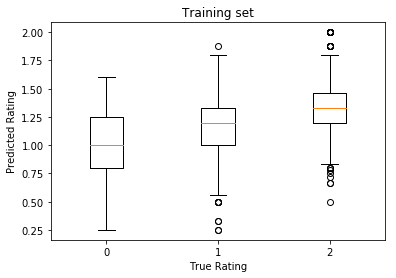

In [43]:
MakeBoxplot(Y_pred, Y, R_train, 'Training set')


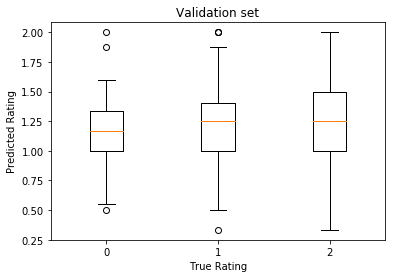

In [44]:
MakeBoxplot(Y_pred, Y, R_valid, 'Validation set')
